# RandomWalk Assessment - Siddhartha Sharma (20BAI10044) VITB

In [86]:
import pandas as pd;
import matplotlib.pyplot as plt;

In [87]:
path="books.csv"
df = pd.read_csv(path);

### Q1: How many rows and columns are there in books.csv dataset?

There are two ways to answer this one is by just writing the name of the dataframe and printing that we will be able to see at the bottom the number of rows and coulmns.
The other way is to use **shape attribute** of dataframe which returns a tuple where the first element is the number of rows and the second element is the number of columns.

In [88]:
df

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish
0,15,48855,48855,3532896,710,553296981,9.780553e+12,"Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-D...",1947.0,Het Achterhuis: Dagboekbrieven 14 juni 1942 - ...,...,2024493,20825,45225,91270,355756,656870,875372,https://images.gr-assets.com/books/1358276407m...,https://images.gr-assets.com/books/1358276407s...,0
1,40,19501,19501,3352398,185,143038419,9.780143e+12,Elizabeth Gilbert,2006.0,"Eat, pray, love: one woman's search for everyt...",...,1206597,49714,100373,149549,310212,332191,314272,https://images.gr-assets.com/books/1503066414m...,https://images.gr-assets.com/books/1503066414s...,0
2,81,7445,7445,2944133,92,074324754X,9.780743e+12,Jeannette Walls,2005.0,The Glass Castle,...,637866,40777,7901,18922,85191,227750,298102,https://images.gr-assets.com/books/1400930557m...,https://images.gr-assets.com/books/1400930557s...,0
3,82,1845,1845,3284484,108,385486804,9.780385e+12,Jon Krakauer,1996.0,Into the Wild,...,665377,17299,19229,35567,135199,248287,227095,https://images.gr-assets.com/books/1403173986m...,https://images.gr-assets.com/books/1403173986s...,0
4,87,1617,1617,265616,109,374500010,9.780375e+12,"Elie Wiesel, Marion Wiesel",1958.0,Un di Velt Hot Geshvign,...,707879,22001,7761,18539,90575,230227,360777,https://images.gr-assets.com/books/1473495285m...,https://images.gr-assets.com/books/1473495285s...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,9788,23399022,23399022,42955411,21,525427651,9.780525e+12,"Amanda Berry, Gina DeJesus, Mary Jordan, Kevin...",2015.0,Hope,...,9102,927,101,195,1180,3301,4325,https://images.gr-assets.com/books/1421708177m...,https://images.gr-assets.com/books/1421708177s...,0
395,9847,20685373,20685373,40000267,18,307720659,9.780308e+12,Suki Kim,2014.0,"Without You, There Is No Us: My Time with the ...",...,10002,1426,145,523,2526,4328,2480,https://images.gr-assets.com/books/1405292426m...,https://images.gr-assets.com/books/1405292426s...,0
396,9887,503248,503248,491309,21,307381269,9.780307e+12,"Howard Dully, Charles Fleming",2007.0,My Lobotomy,...,9615,1247,142,788,2979,3585,2121,https://images.gr-assets.com/books/1320449273m...,https://images.gr-assets.com/books/1320449273s...,0
397,9960,127970,127970,1066433,26,739416383,9.780739e+12,Terry Ryan,2001.0,"The Prize Winner of Defiance, Ohio: How My Mot...",...,11151,1849,118,498,2739,4816,2980,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,0


In [89]:
rows,columns= df.shape
print(f"The number of rows in books.csv are {rows}")
print(f"The number of columns in books.csv are {columns}")

The number of rows in books.csv are 399
The number of columns in books.csv are 24


### Q2: How many books do not have an original title?

This code checks for missing values in the original_title column using attribute **isna** which detects missing values and returns a boolean same-sized object indicating if the values are NA and sum which returns the sum of the values

In [90]:
missing_original_title_count = df['original_title'].isna().sum()

print(f"Number of books without an original titles are {missing_original_title_count}")

Number of books without an original titles are 36


### Q3: How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing null values in the original_title column.

In order to find the unique books we first need to remove the books not having an original title and then count the books having unique book_id.

The first step is made possible using **dropna** attribute which return a new Series with missing values removed and we have taken the parameter subset which tells which columns to include.

The second step is done using the parameter **nunique** which counts the number of distinct elements in specified axis.

In [91]:
df_filtered = df.dropna(subset=['original_title'])
unique_books_count = df_filtered['book_id'].nunique()

print(f"Number of unique books after removing null values in 'original_title': {unique_books_count}")

Number of unique books after removing null values in 'original_title': 363


### Q4: What is the average rating of all the books in the dataset based on ‘average_rating’?


This is done by selecting the average rating column and then using the **mean** attribute which returns the average of your data across a specified axis

In [92]:
average_rating = df['average_rating'].mean()

print(f"Average rating of all books: {average_rating}")

Average rating of all books: 3.9837844611528843


### Q5: Find the number of books published in the year ‘2000’ based on the ‘original_publication_year’.

To achieve this we need to filter the dataframe based on the condition that the original publication year is 2000 then we can either use the **shape** attribute or **len** function to get the count

In [93]:
books_published_in_2000 = df[df['original_publication_year'] == 2000]

number_of_books_published_in_2000 = books_published_in_2000.shape[0]

print(f"Number of books published in the year 2000: {number_of_books_published_in_2000}")

Number of books published in the year 2000: 8


### Q6: Which book (title) has the maximum number of ratings based on ‘work_ratings_count’.

We will be using the **idmax** attribute which returns index of first occurrence of maximum over requested axis.
After this we will use **loc** attribute which access a group of rows and columns by label(s) or a boolean array in our case we will access the title which is having the most work ratings count.

In [94]:
max_ratings_book_index = df['work_ratings_count'].idxmax()
max_ratings_book_title = df.loc[max_ratings_book_index, 'title']

print(f"Book with the maximum number of ratings: {max_ratings_book_title}")

Book with the maximum number of ratings: The Diary of a Young Girl


### Q7: Bucket the average_rating of books into 11 buckets [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0] with 0.5 decimal rounding (eg: average_rating 3.0 to 3.49 will fall in bucket 3.0). Plot bar graph to show total number of books in each rating bucket.

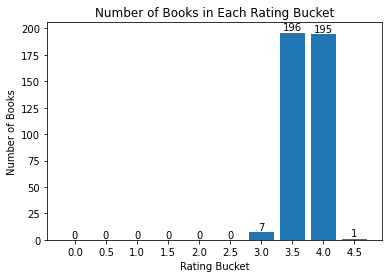

In [95]:
bins = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
labels = [f'{x:.1f}' for x in bins[:-1]]

# Create the 'rating_bucket' column
df['rating_bucket'] = pd.cut(df['average_rating'], bins=bins, labels=labels, include_lowest=True)

# Count the number of books in each rating bucket
rating_counts = df['rating_bucket'].value_counts().sort_index()

# Plot the bar graph with values on top of each bar
fig, ax = plt.subplots()
bars = plt.bar(rating_counts.index, rating_counts)
plt.xlabel('Rating Bucket')
plt.ylabel('Number of Books')
plt.title('Number of Books in Each Rating Bucket')

# Add values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 1), ha='center', va='bottom')

plt.show()